 '''This notebook is focused on some prelimary steps before modeling such as:

1) Data Cleaning
   a) Splitting nutrition column into multiple columns
   b) 

2) '''

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
Recipes_df = pd.read_csv('Recipes_df_1.csv')

In [3]:
Recipes_df.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,Nutrition,RatingCount,RecipeCategory
0,Cranberry Apple Raisin Stuffing Recipe,3.85,15 mins,1 hr,12 servings,300 calories; protein 5.1g; carbohydrates 49.8...,33.0,Stuffing and Dressing Recipes
1,Tofu 'Fish' Fillet Sandwiches Recipe,4.02,15 mins,30 mins,4 servings,622 calories; protein 21.4g; carbohydrates 43....,47.0,Main Dish Recipes
2,Moroccan Tagine with Olives and Artichoke Hear...,4.50,15 mins,45 mins,6 servings,229 calories; protein 14.1g; carbohydrates 31....,2.0,Stews
3,Vegetable Cutlets Recipe,4.13,15 mins,35 mins,6 servings,234 calories; protein 7.7g; carbohydrates 43.6...,23.0,Appetizers and Snacks
4,Deep-Fried Cauliflower and Lemon Sauce Recipe,4.50,15 mins,2 mins,4 servings,531 calories; protein 9.6g; carbohydrates 28.8...,2.0,Cauliflower


## Data Cleaning

In [4]:
Recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1000 non-null   object 
 1   Rating          947 non-null    float64
 2   Prep_Time       965 non-null    object 
 3   Cook_Time       918 non-null    object 
 4   Yield           1000 non-null   object 
 5   Nutrition       997 non-null    object 
 6   RatingCount     947 non-null    float64
 7   RecipeCategory  1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


### Splitting nutrition column into multiple columns

In [5]:
Recipes_df['Nutrition'][10]

'244 calories; protein 8.5g; carbohydrates 10.4g; fat 20.1g; cholesterol 212mg; sodium 69.6mg.                            Full Nutrition'

In [6]:
Recipes_df['Nutrition'].astype(str);

In [7]:
def get_calories(nutrition):
    if not nutrition:
        return None
    
    if not 'calories' in str(nutrition):
        return None
    
    if re.findall("\d+\.?\d calories", str(nutrition)):
        return re.findall("\d+\.?\d calories", str(nutrition))[0]
    else:
        return None
        

In [8]:
get_calories('244 calories; protein 8.5g; carbohydrates 10.4g; fat 20.1g; cholesterol 212mg; sodium 69.6mg.  Full Nutrition')

'244 calories'

In [9]:
Recipes_df['Calories'] = Recipes_df['Nutrition'].apply(get_calories)


In [10]:
def get_protein(nutrition):
    if not nutrition:
        return None
    
    if not 'protein' in str(nutrition):
        return None
    
    if re.findall("protein \d+\.?\dg", str(nutrition)):
        return re.findall("protein \d+\.?\dg", str(nutrition))[0]
    else:
        return None

In [11]:
get_protein('244 calories; protein 8.5g; carbohydrates 10.4g; fat 20.1g; cholesterol 212mg; sodium 69.6mg.  Full Nutrition')

'protein 8.5g'

In [12]:
Recipes_df['Protein(gms)'] = Recipes_df['Nutrition'].apply(get_protein)

In [13]:
def get_carbs(nutrition):
    if not nutrition:
        return None
    
    if not 'carbohydrates' in str(nutrition):
        return None
    
    if re.findall("carbohydrates \d+\.?\dg", str(nutrition)):
        return re.findall("carbohydrates \d+\.?\dg", str(nutrition))[0]
    else:
        return None

In [14]:
get_carbs('244 calories; protein 8.5g; carbohydrates 10.4g; fat 20.1g; cholesterol 212mg; sodium 69.6mg.  Full Nutrition')

'carbohydrates 10.4g'

In [15]:
Recipes_df['Carbs(gms)'] = Recipes_df['Nutrition'].apply(get_carbs)

In [16]:
def get_fat(nutrition):
    if not nutrition:
        return None
    
    if not 'fat' in str(nutrition):
        return None
    
    if re.findall("fat \d+\.?\dg", str(nutrition)):
        return re.findall("fat \d+\.?\dg", str(nutrition))[0]
    else:
        return None

In [17]:
get_fat('244 calories; protein 8.5g; carbohydrates 10.4g; fat 20.1g; cholesterol 212mg; sodium 69.6mg.  Full Nutrition')

'fat 20.1g'

In [18]:
Recipes_df['fat(gms)'] = Recipes_df['Nutrition'].apply(get_fat)

In [19]:
def get_cholestrol(nutrition):
    if not nutrition:
        return None
    
    if not 'cholesterol' in str(nutrition):
        return None
    
    if re.findall("cholesterol \d+\.?\dmg", str(nutrition)):
        return re.findall("cholesterol \d+\.?\dmg", str(nutrition))[0]
    else:
        return None

In [20]:
get_cholestrol('244 calories; protein 8.5g; carbohydrates 10.4g; fat 20.1g; cholesterol 212mg; sodium 69.6mg.  Full Nutrition')

'cholesterol 212mg'

In [21]:
Recipes_df['cholestrol(mg)'] = Recipes_df['Nutrition'].apply(get_cholestrol)

In [22]:
def get_Sodium(nutrition):
    if not nutrition:
        return None
    
    if not 'sodium' in str(nutrition):
        return None
    
    if re.findall("sodium \d+\.?\dmg", str(nutrition)):
        return re.findall("sodium \d+\.?\dmg", str(nutrition))[0]
    else:
        return None

In [23]:
get_Sodium('244 calories; protein 8.5g; carbohydrates 10.4g; fat 20.1g; cholesterol 212mg; sodium 69.6mg.  Full Nutrition')

'sodium 69.6mg'

In [24]:
Recipes_df['sodium(mg)'] = Recipes_df['Nutrition'].apply(get_Sodium)

In [25]:
Recipes_df.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,Nutrition,RatingCount,RecipeCategory,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg)
0,Cranberry Apple Raisin Stuffing Recipe,3.85,15 mins,1 hr,12 servings,300 calories; protein 5.1g; carbohydrates 49.8...,33.0,Stuffing and Dressing Recipes,300 calories,protein 5.1g,carbohydrates 49.8g,fat 9.9g,cholesterol 51.3mg,sodium 589mg
1,Tofu 'Fish' Fillet Sandwiches Recipe,4.02,15 mins,30 mins,4 servings,622 calories; protein 21.4g; carbohydrates 43....,47.0,Main Dish Recipes,622 calories,protein 21.4g,carbohydrates 43.7g,fat 41.6g,cholesterol 10.6mg,sodium 1331.9mg
2,Moroccan Tagine with Olives and Artichoke Hear...,4.50,15 mins,45 mins,6 servings,229 calories; protein 14.1g; carbohydrates 31....,2.0,Stews,229 calories,protein 14.1g,carbohydrates 31.2g,fat 5.4g,cholesterol 20.3mg,sodium 1219.7mg
3,Vegetable Cutlets Recipe,4.13,15 mins,35 mins,6 servings,234 calories; protein 7.7g; carbohydrates 43.6...,23.0,Appetizers and Snacks,234 calories,protein 7.7g,carbohydrates 43.6g,fat 3.4g,cholesterol 31mg,sodium 231.8mg
4,Deep-Fried Cauliflower and Lemon Sauce Recipe,4.50,15 mins,2 mins,4 servings,531 calories; protein 9.6g; carbohydrates 28.8...,2.0,Cauliflower,531 calories,protein 9.6g,carbohydrates 28.8g,fat 42.7g,cholesterol 149.9mg,sodium 230.9mg


In [26]:
Recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1000 non-null   object 
 1   Rating          947 non-null    float64
 2   Prep_Time       965 non-null    object 
 3   Cook_Time       918 non-null    object 
 4   Yield           1000 non-null   object 
 5   Nutrition       997 non-null    object 
 6   RatingCount     947 non-null    float64
 7   RecipeCategory  1000 non-null   object 
 8   Calories        994 non-null    object 
 9   Protein(gms)    959 non-null    object 
 10  Carbs(gms)      989 non-null    object 
 11  fat(gms)        959 non-null    object 
 12  cholestrol(mg)  631 non-null    object 
 13  sodium(mg)      996 non-null    object 
dtypes: float64(2), object(12)
memory usage: 109.5+ KB


In [27]:
Recipes_df = Recipes_df.drop (['Nutrition'], axis = 1)

In [28]:
Recipes_df.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,RatingCount,RecipeCategory,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg)
0,Cranberry Apple Raisin Stuffing Recipe,3.85,15 mins,1 hr,12 servings,33.0,Stuffing and Dressing Recipes,300 calories,protein 5.1g,carbohydrates 49.8g,fat 9.9g,cholesterol 51.3mg,sodium 589mg
1,Tofu 'Fish' Fillet Sandwiches Recipe,4.02,15 mins,30 mins,4 servings,47.0,Main Dish Recipes,622 calories,protein 21.4g,carbohydrates 43.7g,fat 41.6g,cholesterol 10.6mg,sodium 1331.9mg
2,Moroccan Tagine with Olives and Artichoke Hear...,4.50,15 mins,45 mins,6 servings,2.0,Stews,229 calories,protein 14.1g,carbohydrates 31.2g,fat 5.4g,cholesterol 20.3mg,sodium 1219.7mg
3,Vegetable Cutlets Recipe,4.13,15 mins,35 mins,6 servings,23.0,Appetizers and Snacks,234 calories,protein 7.7g,carbohydrates 43.6g,fat 3.4g,cholesterol 31mg,sodium 231.8mg
4,Deep-Fried Cauliflower and Lemon Sauce Recipe,4.50,15 mins,2 mins,4 servings,2.0,Cauliflower,531 calories,protein 9.6g,carbohydrates 28.8g,fat 42.7g,cholesterol 149.9mg,sodium 230.9mg


### Dropping recipes that have no rating

In [29]:
## Since Rating is the predicting variable dropping all nulls

In [30]:
mask = Recipes_df[Recipes_df['Rating'].isna()]
mask.shape

(53, 13)

In [31]:
mask.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,RatingCount,RecipeCategory,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg)
28,Ratatouille with Bitter Melon Recipe,NaN,25 mins,7 mins,4 servings,NaN,Vegetables,76 calories,protein 2.2g,carbohydrates 10.2g,fat 3.7g,None,sodium 291.5mg
113,Vegetarian Cranberry Bean Burger Recipe,NaN,15 mins,15 mins,8 burgers,NaN,Vegetables,314 calories,protein 12.6g,carbohydrates 54.5g,fat 5.3g,None,sodium 1423mg
117,Tempeh-Bean Stuffed Peppers Recipe,NaN,20 mins,47 mins,4 stuffed pepper halves,NaN,Protein,560 calories,protein 32.4g,carbohydrates 50.5g,fat 26.4g,cholesterol 50.3mg,sodium 1221.5mg
146,Baked Stuffed Spaghetti Squash Recipe,NaN,20 mins,1 hr 40 mins,4 stuffed squash halves,NaN,Stuffed Main Dish Recipes,312 calories,protein 7.6g,carbohydrates 36.9g,fat 17.9g,None,sodium 2750.5mg
153,Mediterranean Lentil and Pasta Recipe,NaN,20 mins,45 mins,4 servings,NaN,100+ Pasta and Noodle Recipes,558 calories,protein 18.7g,carbohydrates 90.6g,fat 15.3g,None,sodium 473.4mg


In [32]:
## Verified recipes on the website and no ratings were present so dropping 53 rows. 

In [33]:
Recipes_df.dropna(subset=["Rating"], axis=0, inplace=True)

In [34]:
Recipes_df.shape

(947, 13)

### Coverting all time values to minutes

In [35]:
# Some values are in minutes and some are in hrs under Prep Time and Cook Time. Converting time to minutes

In [36]:
Recipes_df['Prep_Time'].value_counts()

15 mins         256
20 mins         212
10 mins         179
30 mins          89
25 mins          72
5 mins           42
45 mins          17
40 mins          16
35 mins          14
1 hr              7
12 mins           1
2 mins            1
1 hr 30 mins      1
1 hr 20 mins      1
2 hrs             1
12 hrs            1
55 mins           1
1 hr 5 mins       1
Name: Prep_Time, dtype: int64

In [37]:
def convert_minutes(time):
    if not time:
        return None
    
    time_data = re.findall('\d+(?:\.\d+)?', str(time) )
    
    if not time_data:
        return None
    if len(time_data) == 1 and ('hr'in time or 'hrs' in time):
        return 60*int(time_data[0])
    elif len(time_data) ==1:
        return int(time_data[0])
    else:
        return 60*int(time_data[0]) + int(time_data[1])

In [38]:
print(convert_minutes('1 hr 5 mins')) ## Checking if this working fine
print(convert_minutes('1 hr'))
print(convert_minutes('12 hrs'))
print(convert_minutes('2 mins'))

65
60
720
2


In [39]:
## Converting Prep Time and Cook Time to minutes 
Recipes_df['Prep_Time'] = Recipes_df['Prep_Time'].apply(convert_minutes) 
Recipes_df['Cook_Time'] = Recipes_df['Cook_Time'].apply(convert_minutes)

In [40]:
Recipes_df['Prep_Time'].value_counts()

15.0     256
20.0     212
10.0     179
30.0      89
25.0      72
5.0       42
45.0      17
40.0      16
35.0      14
60.0       7
12.0       1
80.0       1
65.0       1
55.0       1
2.0        1
90.0       1
120.0      1
720.0      1
Name: Prep_Time, dtype: int64

In [41]:
Recipes_df.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,RatingCount,RecipeCategory,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg)
0,Cranberry Apple Raisin Stuffing Recipe,3.85,15.0,60.0,12 servings,33.0,Stuffing and Dressing Recipes,300 calories,protein 5.1g,carbohydrates 49.8g,fat 9.9g,cholesterol 51.3mg,sodium 589mg
1,Tofu 'Fish' Fillet Sandwiches Recipe,4.02,15.0,30.0,4 servings,47.0,Main Dish Recipes,622 calories,protein 21.4g,carbohydrates 43.7g,fat 41.6g,cholesterol 10.6mg,sodium 1331.9mg
2,Moroccan Tagine with Olives and Artichoke Hear...,4.50,15.0,45.0,6 servings,2.0,Stews,229 calories,protein 14.1g,carbohydrates 31.2g,fat 5.4g,cholesterol 20.3mg,sodium 1219.7mg
3,Vegetable Cutlets Recipe,4.13,15.0,35.0,6 servings,23.0,Appetizers and Snacks,234 calories,protein 7.7g,carbohydrates 43.6g,fat 3.4g,cholesterol 31mg,sodium 231.8mg
4,Deep-Fried Cauliflower and Lemon Sauce Recipe,4.50,15.0,2.0,4 servings,2.0,Cauliflower,531 calories,protein 9.6g,carbohydrates 28.8g,fat 42.7g,cholesterol 149.9mg,sodium 230.9mg


### Extracting numbers from rest of the columns 

In [42]:
Recipes_df['Calories'] = Recipes_df['Calories'].str.extract('(\d+)', expand=False) 
Recipes_df['Yield'] = Recipes_df['Yield'].str.extract('(\d+)', expand=False)

In [43]:

Recipes_df['Protein(gms)'] = Recipes_df['Protein(gms)'].str.extract('([0-9]+[.]*[0-9]*)', expand=False)
Recipes_df['Carbs(gms)'] = Recipes_df['Carbs(gms)'].str.extract('([0-9]+[.]*[0-9]*)', expand=False)
Recipes_df['fat(gms)'] = Recipes_df['fat(gms)'].str.extract('([0-9]+[.]*[0-9]*)', expand=False)
Recipes_df['cholestrol(mg)'] = Recipes_df['cholestrol(mg)'].str.extract('([0-9]+[.]*[0-9]*)', expand=False)
Recipes_df['sodium(mg)'] = Recipes_df['sodium(mg)'].str.extract('([0-9]+[.]*[0-9]*)', expand=False)

In [44]:
Recipes_df.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,RatingCount,RecipeCategory,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg)
0,Cranberry Apple Raisin Stuffing Recipe,3.85,15.0,60.0,12,33.0,Stuffing and Dressing Recipes,300,5.1,49.8,9.9,51.3,589
1,Tofu 'Fish' Fillet Sandwiches Recipe,4.02,15.0,30.0,4,47.0,Main Dish Recipes,622,21.4,43.7,41.6,10.6,1331.9
2,Moroccan Tagine with Olives and Artichoke Hear...,4.50,15.0,45.0,6,2.0,Stews,229,14.1,31.2,5.4,20.3,1219.7
3,Vegetable Cutlets Recipe,4.13,15.0,35.0,6,23.0,Appetizers and Snacks,234,7.7,43.6,3.4,31,231.8
4,Deep-Fried Cauliflower and Lemon Sauce Recipe,4.50,15.0,2.0,4,2.0,Cauliflower,531,9.6,28.8,42.7,149.9,230.9


###  Null Values 

In [45]:
Recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           947 non-null    object 
 1   Rating          947 non-null    float64
 2   Prep_Time       912 non-null    float64
 3   Cook_Time       866 non-null    float64
 4   Yield           946 non-null    object 
 5   RatingCount     947 non-null    float64
 6   RecipeCategory  947 non-null    object 
 7   Calories        941 non-null    object 
 8   Protein(gms)    909 non-null    object 
 9   Carbs(gms)      936 non-null    object 
 10  fat(gms)        907 non-null    object 
 11  cholestrol(mg)  599 non-null    object 
 12  sodium(mg)      943 non-null    object 
dtypes: float64(4), object(9)
memory usage: 103.6+ KB


In [46]:
mask = Recipes_df[(Recipes_df['Yield'].isna())]
mask.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,RatingCount,RecipeCategory,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg)
336,Low-Cholesterol Egg Drop Noodle Soup Recipe,4.0,15.0,5.0,NaN,1.0,Soup Recipes,138,8.4,11,6.7,NaN,2109.1


In [47]:
Recipes_df["Yield"].fillna(1, inplace = True) # Yield for Noodle soup will be 1 cup

### Replacing null values for calories and nutrition info with mean of the recipe category

In [48]:
Recipes_df['Yield'] = pd.to_numeric(Recipes_df['Yield'])
Recipes_df['Calories'] = pd.to_numeric(Recipes_df['Calories'])
Recipes_df['Protein(gms)'] =pd.to_numeric(Recipes_df['Protein(gms)'])
Recipes_df['Carbs(gms)'] =pd.to_numeric(Recipes_df['Carbs(gms)'])
Recipes_df['fat(gms)'] =pd.to_numeric(Recipes_df['fat(gms)'])
Recipes_df['cholestrol(mg)'] =pd.to_numeric(Recipes_df['cholestrol(mg)'])
Recipes_df['sodium(mg)'] = pd.to_numeric(Recipes_df['sodium(mg)'])

In [49]:
## creating a mask to verify if NaNs are replaced

In [50]:
mask_soup = Recipes_df[(Recipes_df['RecipeCategory'] == 'Soup Recipes')]
mask_soup.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,RatingCount,RecipeCategory,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg)
44,Caldo De Res (Beef Soup) Recipe,4.49,NaN,NaN,4,104.0,Soup Recipes,359.0,28.3,36.5,11.7,49.9,1880.6
46,Asparagus Soup Recipe,4.33,20.0,15.0,4,93.0,Soup Recipes,119.0,5.2,11.2,6.8,18.3,197.9
61,Instant Pot&reg; Celery Soup Recipe,4.33,20.0,25.0,4,9.0,Soup Recipes,188.0,4.3,25.9,7.7,NaN,792.4
68,Vegetable Soup - Irish Style Recipe,3.89,10.0,20.0,6,37.0,Soup Recipes,198.0,NaN,45.2,0.4,NaN,53.5
76,White Bean Soup Recipe,4.50,20.0,75.0,6,58.0,Soup Recipes,161.0,7.2,28.8,NaN,NaN,347.7


In [51]:
for column in Recipes_df.columns:
    if Recipes_df [column].dtype != 'O':
        Recipes_df [column] = Recipes_df [column].fillna(Recipes_df.groupby('RecipeCategory')[column].transform('mean'))

In [52]:
mask_soup = Recipes_df[(Recipes_df['RecipeCategory'] == 'Soup Recipes')]
mask_soup.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,RatingCount,RecipeCategory,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg)
44,Caldo De Res (Beef Soup) Recipe,4.49,18.518519,86.703704,4,104.0,Soup Recipes,359.0,28.300000,36.5,11.700000,49.900000,1880.6
46,Asparagus Soup Recipe,4.33,20.000000,15.000000,4,93.0,Soup Recipes,119.0,5.200000,11.2,6.800000,18.300000,197.9
61,Instant Pot&reg; Celery Soup Recipe,4.33,20.000000,25.000000,4,9.0,Soup Recipes,188.0,4.300000,25.9,7.700000,41.903333,792.4
68,Vegetable Soup - Irish Style Recipe,3.89,10.000000,20.000000,6,37.0,Soup Recipes,198.0,11.907273,45.2,0.400000,41.903333,53.5
76,White Bean Soup Recipe,4.50,20.000000,75.000000,6,58.0,Soup Recipes,161.0,7.200000,28.8,13.089286,41.903333,347.7


In [53]:
mask = Recipes_df[(Recipes_df['RecipeCategory'] == 'Soup Recipes')]
mask.describe()

,Rating,Prep_Time,Cook_Time,Yield,RatingCount,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg)
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,4.314483,18.518519,86.703704,6.672414,53.741379,316.172414,11.907273,40.886207,13.089286,41.903333,811.537931
std,0.611160,5.511521,127.576001,3.284135,109.218847,202.701244,7.098155,28.024722,11.565916,30.203657,553.137969
min,1.000000,5.000000,5.000000,1.000000,1.000000,41.000000,1.200000,9.300000,0.200000,0.700000,42.300000
25%,4.092500,15.000000,30.000000,4.500000,3.250000,188.500000,7.500000,20.675000,5.550000,29.775000,401.000000
50%,4.420000,20.000000,35.000000,6.000000,16.000000,280.000000,11.250000,34.600000,9.450000,41.903333,619.850000
75%,4.630000,20.000000,86.703704,8.000000,67.750000,380.000000,14.375000,53.925000,16.650000,41.903333,1122.925000
max,5.000000,30.000000,600.000000,20.000000,751.000000,1363.000000,37.500000,176.300000,60.900000,145.700000,2256.700000


In [54]:
## Null are now replaced!

In [55]:
Recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           947 non-null    object 
 1   Rating          947 non-null    float64
 2   Prep_Time       946 non-null    float64
 3   Cook_Time       942 non-null    float64
 4   Yield           947 non-null    int64  
 5   RatingCount     947 non-null    float64
 6   RecipeCategory  947 non-null    object 
 7   Calories        946 non-null    float64
 8   Protein(gms)    945 non-null    float64
 9   Carbs(gms)      947 non-null    float64
 10  fat(gms)        944 non-null    float64
 11  cholestrol(mg)  934 non-null    float64
 12  sodium(mg)      946 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 103.6+ KB


In [56]:
mask = Recipes_df[Recipes_df['cholestrol(mg)'].isna()]
mask.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,RatingCount,RecipeCategory,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg)
9,Miller's Marinara Recipe,4.23,15.0,485.0,12,30.0,Tomato,98.0,2.4,13.1,5.1,NaN,1448.2
110,Gluten-Free Teff Crackers Recipe,4.58,10.0,40.0,4,12.0,Snacks,161.0,4.9,18.3,8.5,NaN,150.4
190,Pumpkin Quinoa Muffins Recipe,3.43,15.0,35.0,24,7.0,Quick Bread Recipes,116.0,3.1,14.0,5.8,NaN,128.9
266,Nicole's Vegetarian Marshmallows Recipe,1.50,25.0,15.0,1,2.0,Dessert Recipes,108.0,0.4,27.3,NaN,NaN,NaN
271,Whole Wheat Drop Biscuits Recipe,4.39,5.0,10.0,16,80.0,Vegan,91.0,2.2,12.4,3.9,NaN,243.1


In [57]:
mask = Recipes_df[Recipes_df['RecipeCategory'] == 'Dessert Recipes'] ## Looks like we just have 1 row with cakes
mask.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,RatingCount,RecipeCategory,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg)
266,Nicole's Vegetarian Marshmallows Recipe,1.5,25.0,15.0,1,2.0,Dessert Recipes,108.0,0.4,27.3,NaN,NaN,NaN


In [58]:
for column in Recipes_df.columns:
    if Recipes_df [column].dtype != 'O':
        Recipes_df [column] = Recipes_df [column].fillna(Recipes_df[column].mean())

In [59]:
Recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           947 non-null    object 
 1   Rating          947 non-null    float64
 2   Prep_Time       947 non-null    float64
 3   Cook_Time       947 non-null    float64
 4   Yield           947 non-null    int64  
 5   RatingCount     947 non-null    float64
 6   RecipeCategory  947 non-null    object 
 7   Calories        947 non-null    float64
 8   Protein(gms)    947 non-null    float64
 9   Carbs(gms)      947 non-null    float64
 10  fat(gms)        947 non-null    float64
 11  cholestrol(mg)  947 non-null    float64
 12  sodium(mg)      947 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 103.6+ KB


In [60]:
## Replaced remaining values with mean of the columns

## Converting mg to gms 

In [61]:
Recipes_df['cholestrol(gms)'] = Recipes_df['cholestrol(mg)']/1000
Recipes_df['sodium(gms)'] = Recipes_df['sodium(mg)']/1000

In [62]:
Recipes_df_tab = Recipes_df.drop (['cholestrol(mg)','sodium(mg)'] , axis = 1)

In [63]:
Recipes_df_tab.to_csv ('Recipes_df_tab.csv')

In [65]:
Recipes_df_new = Recipes_df_tab.drop (['Title', 'RecipeCategory'] , axis = 1)

In [66]:
Recipes_df_new['Weighted_review'] = Recipes_df_new['Rating'] * Recipes_df_new['RatingCount']

In [67]:
Recipes_df_new.head()

,Rating,Prep_Time,Cook_Time,Yield,RatingCount,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(gms),sodium(gms),Weighted_review
0,3.85,15.0,60.0,12,33.0,300.0,5.1,49.8,9.9,0.0513,0.5890,127.05
1,4.02,15.0,30.0,4,47.0,622.0,21.4,43.7,41.6,0.0106,1.3319,188.94
2,4.50,15.0,45.0,6,2.0,229.0,14.1,31.2,5.4,0.0203,1.2197,9.00
3,4.13,15.0,35.0,6,23.0,234.0,7.7,43.6,3.4,0.0310,0.2318,94.99
4,4.50,15.0,2.0,4,2.0,531.0,9.6,28.8,42.7,0.1499,0.2309,9.00


Recipes_df_new = Recipes_df_new[['Prep_Time', 'Cook_Time', 'Yield', 'RatingCount', 'Calories', 'Protein(gms)', 
                                 'Carbs(gms)', 'fat(gms)', 'cholestrol(gms)','sodium(gms)', 'Rating' ]]


In [68]:
Recipes_df_new.to_csv ('Recipes_df_new.csv')


In [69]:
Recipes_df_new.describe()

,Rating,Prep_Time,Cook_Time,Yield,RatingCount,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(gms),sodium(gms),Weighted_review
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,4.334889,19.766517,47.705245,6.574446,49.800422,335.538755,13.697612,39.214765,15.319263,0.048425,0.682062,220.084013
std,0.534716,24.951214,71.177070,6.484614,105.650713,186.677674,10.024248,25.248234,11.409170,0.046186,0.531318,474.753139
min,1.000000,2.000000,1.000000,1.000000,1.000000,16.000000,0.100000,0.100000,0.100000,0.000100,0.001900,1.000000
25%,4.070000,15.000000,20.000000,4.000000,3.000000,205.500000,6.900000,21.400000,6.800000,0.016800,0.314900,15.000000
50%,4.420000,15.000000,30.000000,6.000000,12.000000,307.000000,11.900000,35.200000,12.800000,0.038000,0.583000,50.050000
75%,4.670000,20.250000,50.000000,8.000000,49.000000,425.000000,17.700000,51.550000,20.450000,0.060750,0.936050,206.550000
max,5.000000,720.000000,720.000000,100.000000,980.000000,1363.000000,80.400000,184.700000,73.900000,0.336700,4.139000,4380.600000


## <font color = 'CornflowerBlue'> Data Visualization</font>

### Exploring outliers 

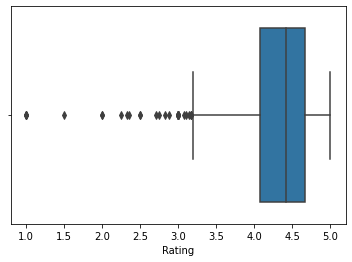

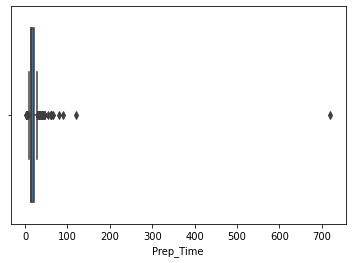

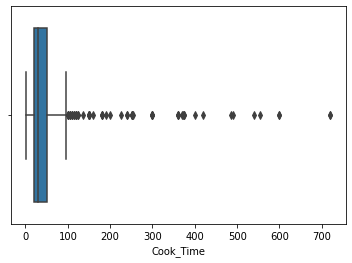

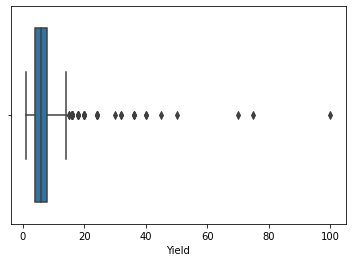

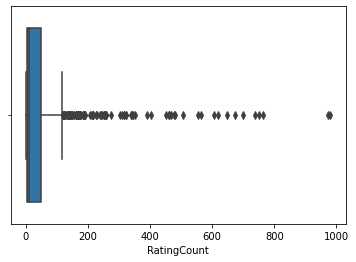

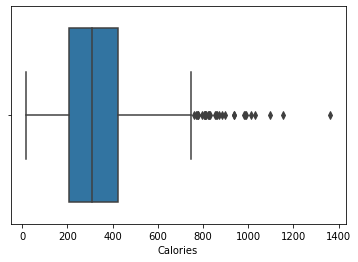

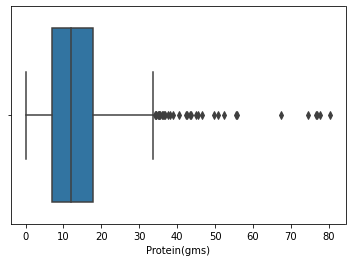

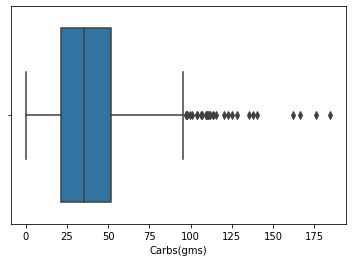

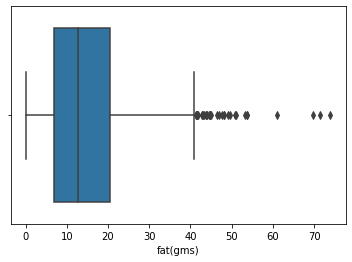

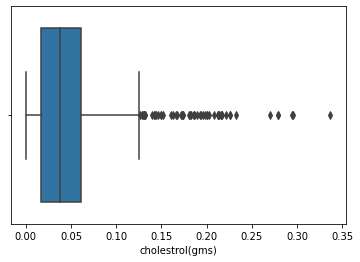

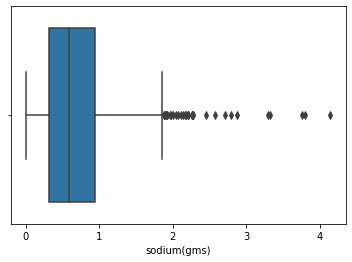

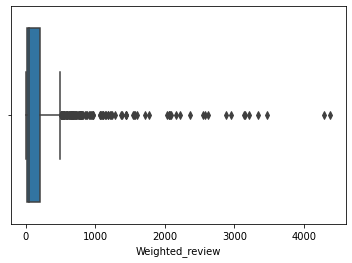

In [70]:
for column in Recipes_df_new.columns:
    sns.boxplot( x= Recipes_df_new[column])
    plt.show()

###  Outliers on Prep and Cook time

In [71]:
## Prep Time

In [72]:
Recipes_df_new['Prep_Time'].max()

720.0

In [73]:
print(Recipes_df[Recipes_df.Prep_Time == Recipes_df.Prep_Time.max()])  


                   Title  Rating  Prep_Time  Cook_Time  Yield  RatingCount  \
50  Cowpoke Beans Recipe    4.49      720.0  46.333333      7         37.0   

   RecipeCategory  Calories  Protein(gms)  Carbs(gms)  fat(gms)  \
50      Side Dish     127.0      8.946875        14.3       6.5   

    cholestrol(mg)  sodium(mg)  cholestrol(gms)  sodium(gms)  
50            14.5       705.1           0.0145       0.7051  


In [74]:
mask = Recipes_df[Recipes_df['Title'].str.contains('Bean')]
mask.head()

,Title,Rating,Prep_Time,Cook_Time,Yield,RatingCount,RecipeCategory,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(mg),sodium(mg),cholestrol(gms),sodium(gms)
7,Baked Black Bean and Spinach Flautas Recipe,4.25,25.0,25.000000,10,4.0,Latin American,209.0,10.800000,34.0,4.5,8.800000,587.1,0.008800,0.5871
20,Black Bean and Butternut Squash Enchilada Cass...,4.67,15.0,90.000000,1,3.0,Latin American,767.0,32.000000,89.4,32.9,59.500000,1475.3,0.059500,1.4753
25,Cheesy Black Bean Casserole Recipe,4.38,10.0,30.000000,6,21.0,Casserole Recipes,466.0,30.600000,53.2,14.7,52.200000,1100.5,0.052200,1.1005
50,Cowpoke Beans Recipe,4.49,720.0,46.333333,7,37.0,Side Dish,127.0,8.946875,14.3,6.5,14.500000,705.1,0.014500,0.7051
63,Vegetarian Bloody Mary Bean Chili Recipe,5.00,20.0,100.000000,8,1.0,Chili Recipes,258.0,13.000000,48.5,3.3,16.066667,1612.6,0.016067,1.6126


In [75]:
mask['Prep_Time'].describe()

count     81.000000
mean      26.604938
std       78.596387
min        5.000000
25%       10.000000
50%       15.000000
75%       20.000000
max      720.000000
Name: Prep_Time, dtype: float64

In [76]:
Recipes_df_new['Prep_Time'] = Recipes_df_new['Prep_Time'].replace(720,mask['Prep_Time'].mean())

In [77]:
Recipes_df_new.describe()

,Rating,Prep_Time,Cook_Time,Yield,RatingCount,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(gms),sodium(gms),Weighted_review
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,4.334889,19.034316,47.705245,6.574446,49.800422,335.538755,13.697612,39.214765,15.319263,0.048425,0.682062,220.084013
std,0.534716,10.186258,71.177070,6.484614,105.650713,186.677674,10.024248,25.248234,11.409170,0.046186,0.531318,474.753139
min,1.000000,2.000000,1.000000,1.000000,1.000000,16.000000,0.100000,0.100000,0.100000,0.000100,0.001900,1.000000
25%,4.070000,15.000000,20.000000,4.000000,3.000000,205.500000,6.900000,21.400000,6.800000,0.016800,0.314900,15.000000
50%,4.420000,15.000000,30.000000,6.000000,12.000000,307.000000,11.900000,35.200000,12.800000,0.038000,0.583000,50.050000
75%,4.670000,20.250000,50.000000,8.000000,49.000000,425.000000,17.700000,51.550000,20.450000,0.060750,0.936050,206.550000
max,5.000000,120.000000,720.000000,100.000000,980.000000,1363.000000,80.400000,184.700000,73.900000,0.336700,4.139000,4380.600000


In [78]:
### Cook Time

In [79]:
print(Recipes_df[Recipes_df.Cook_Time == Recipes_df.Cook_Time.max()])  


                                             Title  Rating  Prep_Time  \
18   Slow Cooker Spaghetti Bolognaise Sauce Recipe    3.00       30.0   
976                    Mushroom Lentil Barley Stew    4.09       15.0   

     Cook_Time  Yield  RatingCount                  RecipeCategory  Calories  \
18       720.0     12          7.0   Sauces and Condiments Recipes     380.0   
976      720.0      8        304.0  Soups, Stews and Chili Recipes     213.0   

     Protein(gms)  Carbs(gms)  fat(gms)  cholestrol(mg)  sodium(mg)  \
18           18.8        37.3      17.2        4.400000      1328.0   
976           8.4        43.9       1.2       36.336364       466.0   

     cholestrol(gms)  sodium(gms)  
18          0.004400        1.328  
976         0.036336        0.466  


In [80]:
%store Recipes_df_new

Stored 'Recipes_df_new' (DataFrame)


### Pairplot to understand  relationships between each variable 

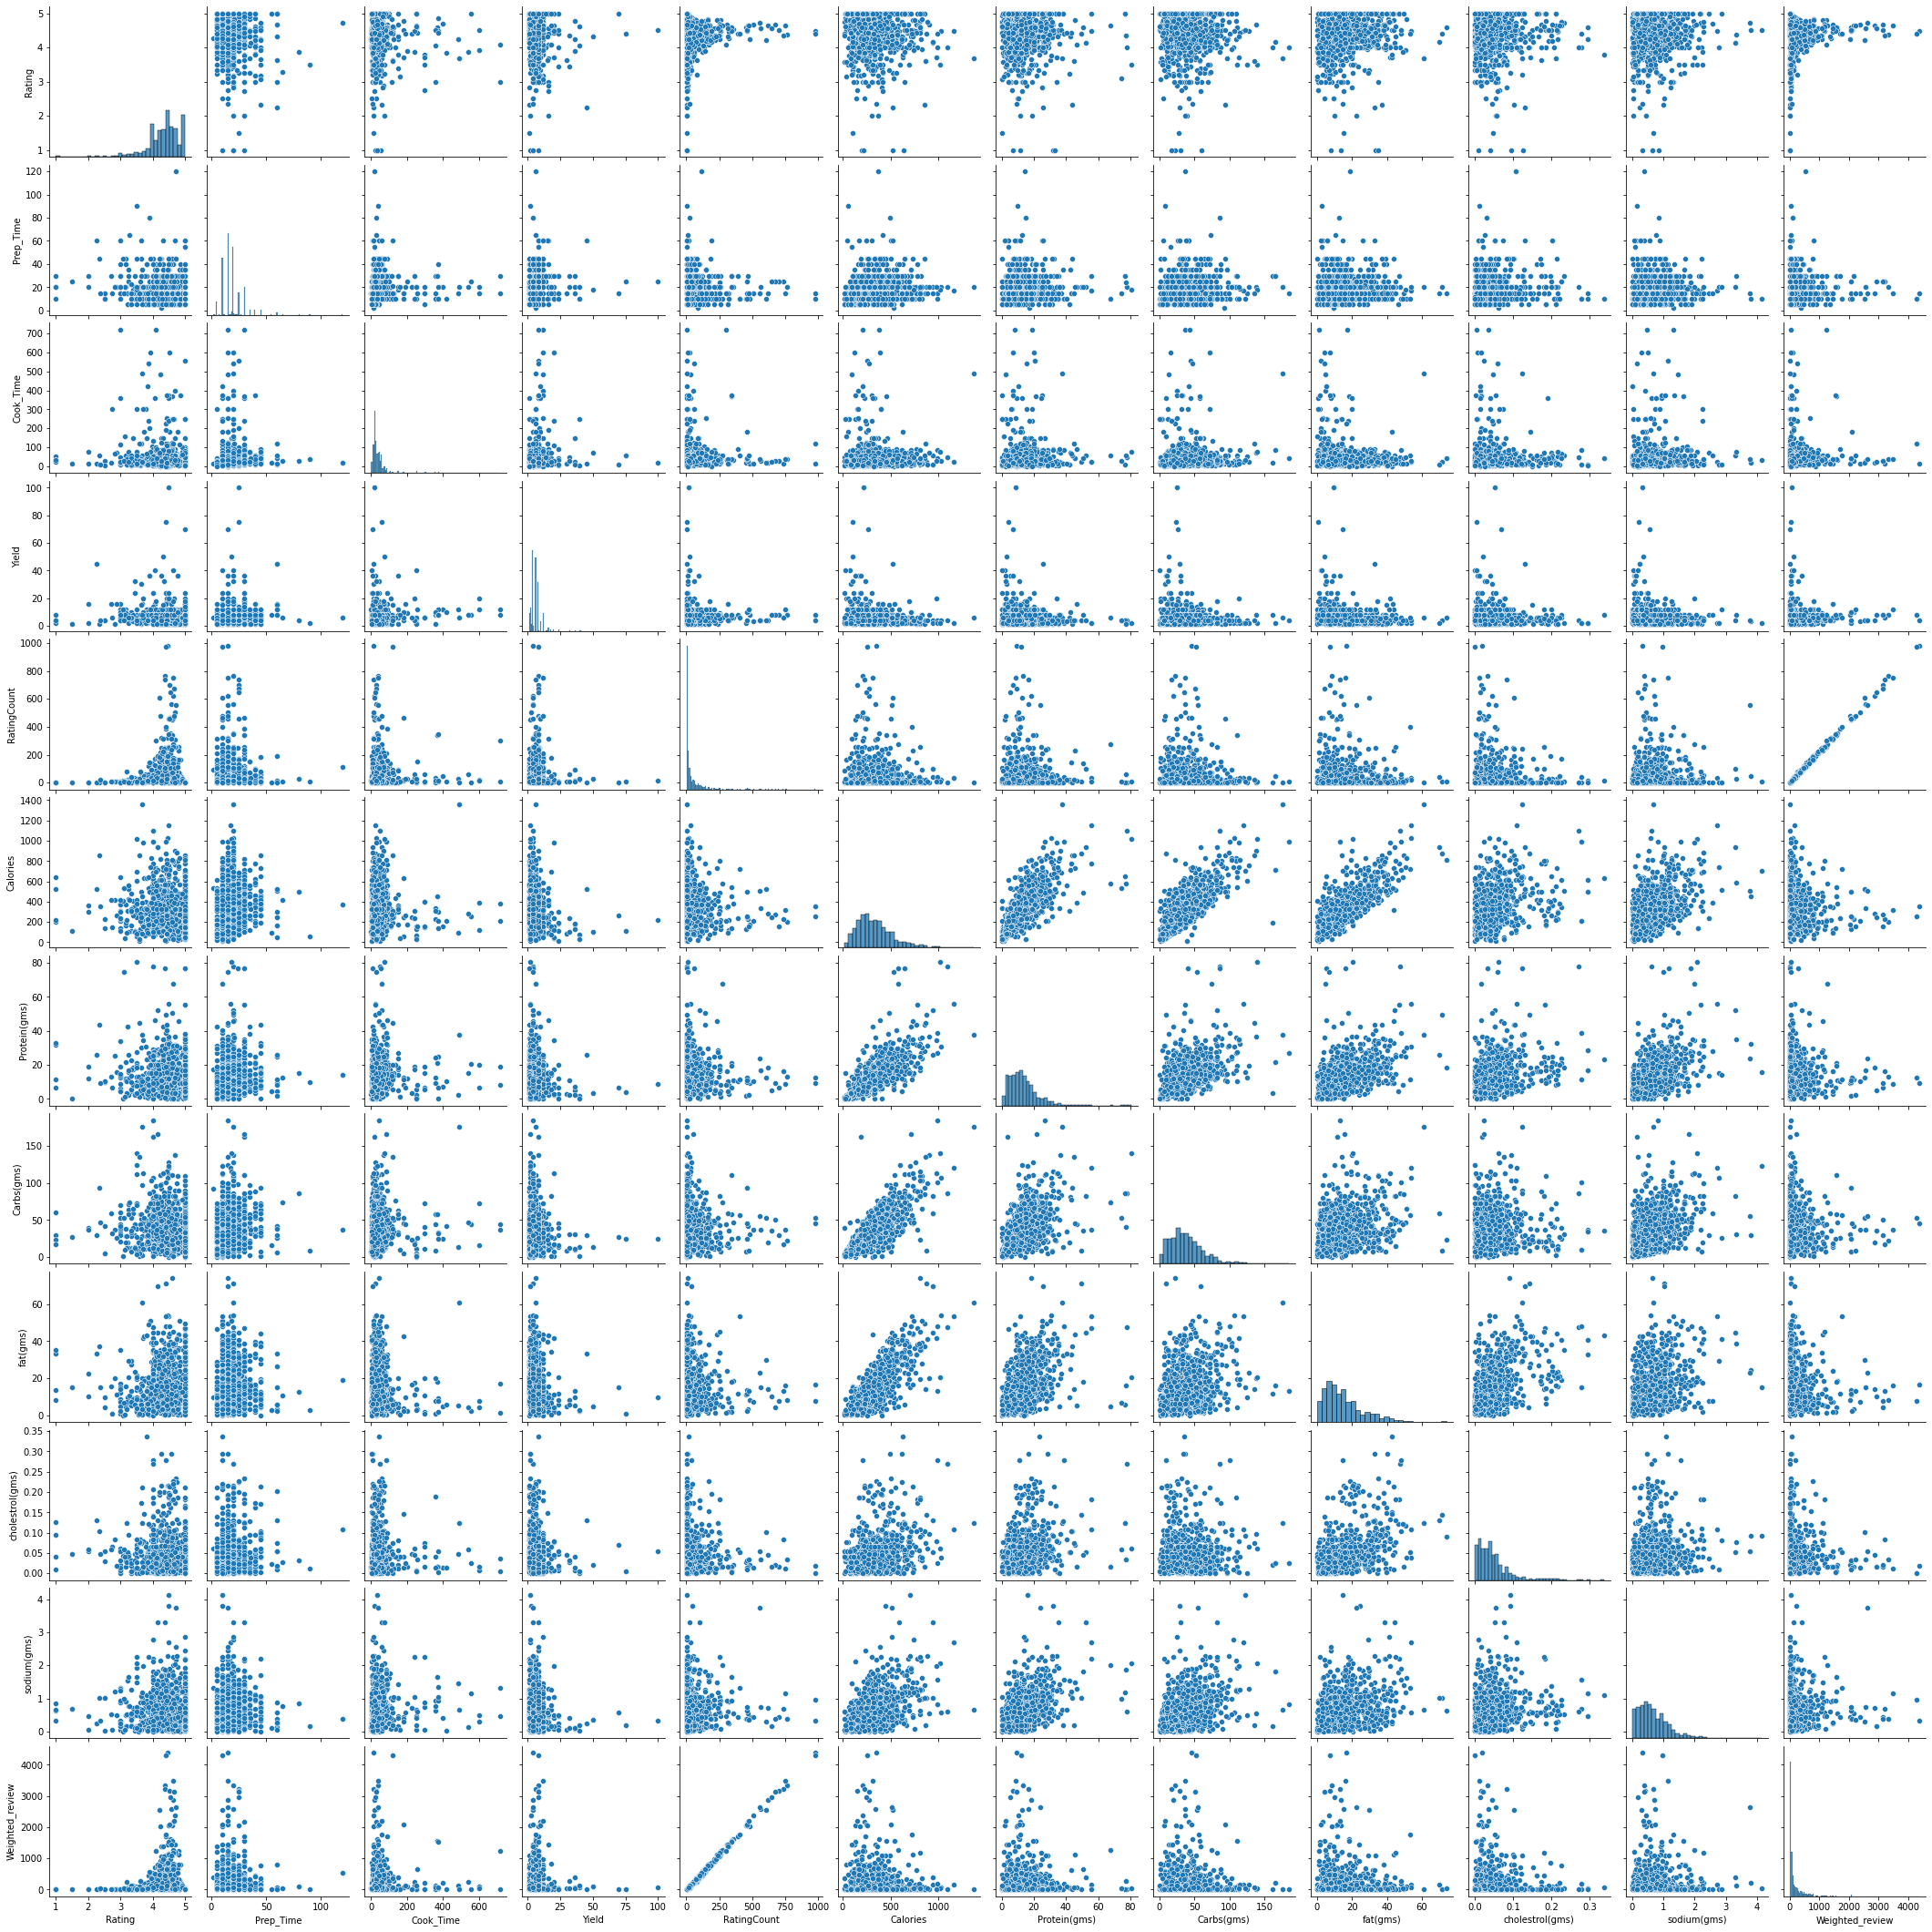

In [81]:
sns.pairplot(Recipes_df_new);


'''Some key observations:
 - Looks like the rating (predicting variable) is skewed onto the left
 - Most features have a negative relation with rating
 - Calorie value is linearly related to nutrition values '''

In [82]:
Recipes_df_new.corr()

,Rating,Prep_Time,Cook_Time,Yield,RatingCount,Calories,Protein(gms),Carbs(gms),fat(gms),cholestrol(gms),sodium(gms),Weighted_review
Rating,1.000000,-0.076625,-0.068172,-0.037989,0.074507,-0.000040,-0.034062,-0.042931,0.066723,-0.019022,0.088467,0.087348
Prep_Time,-0.076625,1.000000,0.054530,0.128337,-0.020067,0.083563,0.074155,0.093694,0.032905,0.029448,-0.000534,-0.019009
Cook_Time,-0.068172,0.054530,1.000000,0.104889,0.039757,-0.031231,0.021413,0.034730,-0.103888,-0.042678,0.038538,0.036002
Yield,-0.037989,0.128337,0.104889,1.000000,0.001141,-0.191485,-0.142095,-0.141617,-0.160764,-0.098450,-0.133338,0.000822
RatingCount,0.074507,-0.020067,0.039757,0.001141,1.000000,-0.044160,-0.012036,-0.022721,-0.052258,-0.054590,0.022911,0.999145
Calories,-0.000040,0.083563,-0.031231,-0.191485,-0.044160,1.000000,0.723825,0.754758,0.776839,0.345363,0.471365,-0.043766
Protein(gms),-0.034062,0.074155,0.021413,-0.142095,-0.012036,0.723825,1.000000,0.478466,0.463338,0.300546,0.482698,-0.011164
Carbs(gms),-0.042931,0.093694,0.034730,-0.141617,-0.022721,0.754758,0.478466,1.000000,0.260050,0.027400,0.351251,-0.024796
fat(gms),0.066723,0.032905,-0.103888,-0.160764,-0.052258,0.776839,0.463338,0.260050,1.000000,0.462571,0.320437,-0.049690
cholestrol(gms),-0.019022,0.029448,-0.042678,-0.098450,-0.054590,0.345363,0.300546,0.027400,0.462571,1.000000,0.133687,-0.054624


'''Looks like the features are negatively correlated to the predicting variable '''

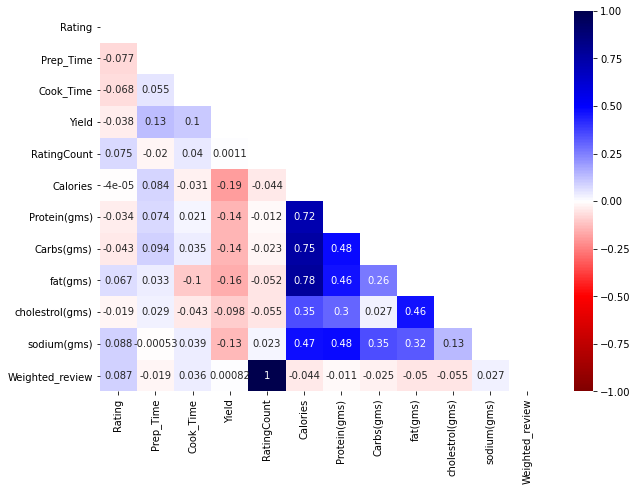

In [83]:
upper = np.triu(Recipes_df_new.corr()) 
plt.figure(figsize=(10, 7))
sns.heatmap(Recipes_df_new.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);

''' Some collinearity is seen between calories and other nutrients. Looking into VIF to understand more'''

### Variance Inflation Factor

In [84]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [85]:
def vif(df_X):
    '''
    Calculate the VIF for each feature of df_X (a Pandas DataFrame).
    '''
    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    
    return pd.Series(vif_data, index=df_X.columns)

In [86]:
vif(Recipes_df_new.iloc[:, :10]) ## Calculating VIFs for only features


Rating               8.352135
Prep_Time            4.432058
Cook_Time            1.483186
Yield                2.131483
RatingCount          1.237730
Calories           127.959831
Protein(gms)         9.193169
Carbs(gms)          30.918120
fat(gms)            28.310802
cholestrol(gms)      2.783057
dtype: float64

'''Calories has a very high VIF, so dropping Calories. 
  Carbs and fat have high VIFs too but given the small collinearity with rating will retain'''

In [87]:
vif(Recipes_df_new[['Prep_Time', 'Cook_Time', 'Yield', 'RatingCount', 'Protein(gms)', 'Carbs(gms)','fat(gms)', 'cholestrol(gms)', 'sodium(gms)' ]])

Prep_Time          3.587612
Cook_Time          1.466361
Yield              1.891617
RatingCount        1.192797
Protein(gms)       5.101925
Carbs(gms)         4.310382
fat(gms)           4.252259
cholestrol(gms)    2.693116
sodium(gms)        3.503501
dtype: float64

'''Looks good! So moving into fitting the model'''

## Linear Regression Baseline with Rating as a predictive variable

### Splitting data into test and train

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create an empty model
lm = LinearRegression()

In [89]:
X = Recipes_df_new [['Prep_Time', 'Cook_Time', 'Yield', 
                     'RatingCount', 'Protein(gms)', 'Carbs(gms)','fat(gms)', 
                     'cholestrol(gms)', 'sodium(gms)' ]] # Without calories

# Target
y = Recipes_df_new['Rating']

In [90]:
#Split the data 80 - 20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state = 42)

### Standard Scaling Features

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [92]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [93]:
X_tr = std.transform(X_train.values)

In [94]:
X_te = std.transform(X_test.values)

In [95]:
# Fit  
lm.fit(X_tr, y_train)

LinearRegression()

In [96]:
lm.score(X_tr, y_train)

0.04066689903986187

In [97]:
lm.score(X_te, y_test)

0.013080654645738155

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [99]:
# Compare the actual y values in the training set with the predicted values
y_actual_train = y_train
y_predicted_train = lm.predict(X_tr)
y_predicted_train.shape


(757,)

In [100]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(y_actual_train, y_predicted_train))

0.5209444962556603

In [101]:

# Compare the actual y values in the test set with the predicted values
y_actual_test = y_test
y_predicted_test = lm.predict(X_te)
y_predicted_test.shape

(190,)

In [102]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(y_actual_test, y_predicted_test))

0.5405132247575003

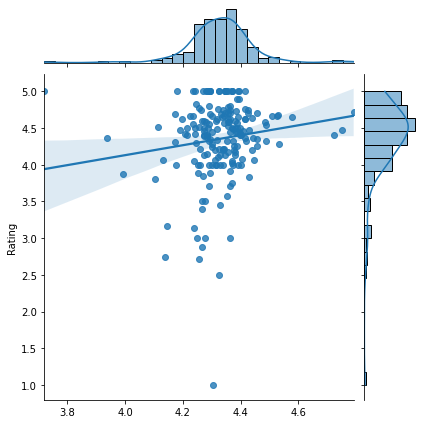

In [103]:
preds = lm.predict(X_te)

sns.jointplot(x=preds,y=y_test, kind='reg')

In [104]:
#Create the model
model = sm.OLS(y_train, sm.add_constant(X_tr)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.518
Date:                Thu, 13 May 2021   Prob (F-statistic):           0.000278
Time:                        21:46:25   Log-Likelihood:                -580.49
No. Observations:                 757   AIC:                             1181.
Df Residuals:                     747   BIC:                             1227.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3300      0.019    227.172      0.000       4.293       4.367
x1            -0.0435      0.019     -2.245      0.025      -0.082      -0.005
x2            -0.0292      0.019     -1.501      0.134      -0.067       0.009
x3            -0.0002      0.020     -0.010      0.992      -0.039       0.039
x4             0.0396      0.019      2.068      0.039       0.002       0.077
x5            -0.0769      0.025     -3.053      0.002      -0.126      -0.027
x6            -0.0108      0.022     -0.480      0.632      -0.055       0.033
x7             0.0611      0.024      2.571      0.010       0.014       0.108
x8            -0.0256      0.022     -1.173      0.241      -0.068       0.017
x9             0.0501      0.022      2.276      0.023       0.007       0.093
==============================================================================
Omnibus:                      329.483   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2292.662
Skew:                          -1.820   Prob(JB):                         0.00
Kurtosis:                      10.709   Cond. No.                         2.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
import scipy.stats as stats
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

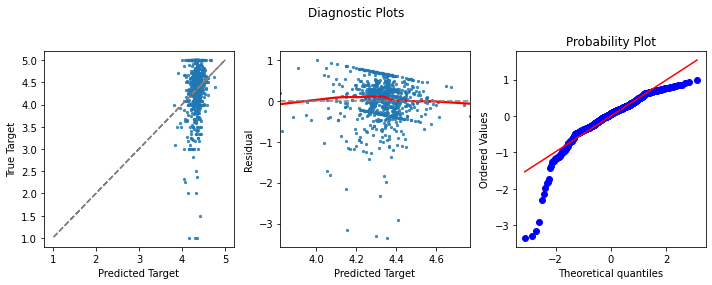

In [106]:
diagnostic_plots(fit.fittedvalues, y_train, fit.resid)


''' There is no linear relationship between the target and features resulting in a very low R2. Looking into the pairplot looks like rating count could be transformed to create a linear relationship'''